In [ ]:
import pandas as pd

# Load the dataset
file_path = 'UpdatedResumeDataSet.csv'
data = pd.read_csv(file_path)

# Remove rows with missing values
data.dropna(inplace=True)

data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
print ("Displaying the distinct categories of resume:\n\n ")
print (data['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [ ]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (data['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


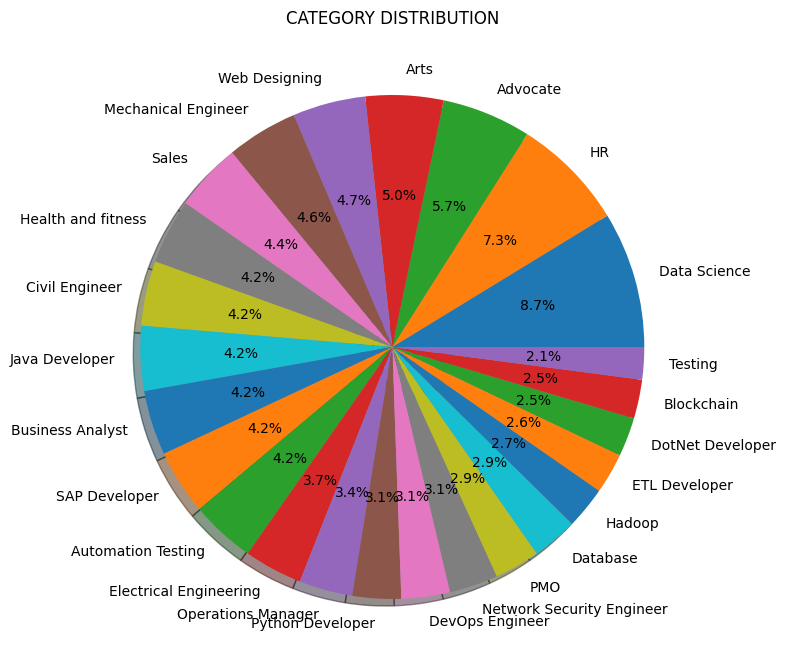

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
targetCounts = data['Category'].value_counts()
targetLabels  = data['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(18,18))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Sample job description (can be replaced with user input)
job_description = "Looking for a Data Scientist skilled in Python, machine learning, and data visualization."

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    stop_words = set(stopwords.words('english'))  # Stopword set
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# Preprocess resumes and job description
data['cleaned_text'] = data['Resume'].apply(preprocess_text)
print(data[['Category', 'cleaned_text']].head())

cleaned_job_description = preprocess_text(job_description)

# Combine job description and resumes into a single corpus
corpus = [cleaned_job_description] + list(data['Resume'])

       Category                                       cleaned_text
0  Data Science  skills programming languages python pandas num...
1  Data Science  education details may 2013 may 2017 uitrgpv da...
2  Data Science  areas interest deep learning control system de...
3  Data Science  skills â¢ r â¢ python â¢ sap hana â¢ table...
4  Data Science  education details mca ymcaust faridabad haryan...


In [ ]:
data.head()

,Category,Resume,Cleaned_Resume,Similarity_Score,cleaned_text
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,0.082504,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 may 2017 uitrgpv da...,0.156258,education details may 2013 may 2017 uitrgpv da...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...,0.101898,areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills â¢ r â¢ python â¢ sap hana â¢ table...,0.079093,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,0.084517,education details mca ymcaust faridabad haryan...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Calculate TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

# Compute cosine similarities between job description and each resume
similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

# Append similarity scores to the dataset
data['Similarity_Score'] = similarities

# Rank candidates by similarity score
top_candidates = data.sort_values(by='Similarity_Score', ascending=False)

# Display the top 5 most suitable candidates
print("Top 5 Suitable Candidates for the Job:")
print(top_candidates[['Category', 'Resume', 'Similarity_Score']].head())

Top 5 Suitable Candidates for the Job:
        Category                                             Resume  \
36  Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...   
16  Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...   
6   Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...   
26  Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...   
29  Data Science  Expertise â Data and Quantitative Analysis â...   

    Similarity_Score  
36          0.386565  
16          0.386565  
6           0.386565  
26          0.386565  
29          0.264580  
